In [3]:
# %%
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [4]:
# Load the synthetic dataset
df = pd.read_csv("western_coast_weather_hourly.csv", parse_dates=["Timestamp"])

# Display the first few rows
df.head()

# %%
# Check for missing values
df.isnull().sum()

# %%
# Drop rows with missing values (if any)
df = df.dropna()

# %%
# Add time-based features
df["Hour"] = df["Timestamp"].dt.hour
df["DayOfYear"] = df["Timestamp"].dt.dayofyear

# %%
# Display updated dataframe
df.head()


,Timestamp,Latitude,Longitude,AirTemp (°C),SeaTemp (°C),WindSpeed (km/h),WindDir (°),WaveHeight (m),SwellPeriod (s),Humidity (%),Pressure (hPa),Precipitation (mm),AirTemp_Lag24h,Hour,DayOfYear
72,2020-01-02 00:00:00,19.0760,72.8777,28.531831,28.490348,5.431968,121.342122,1.066870,3.659623,71.666059,1010.893524,0.0,29.232424,0,2
73,2020-01-02 00:00:00,15.2993,74.1240,28.573952,27.545198,12.183792,115.232890,1.207899,1.526935,82.110487,1014.341720,0.0,28.269503,0,2
74,2020-01-02 00:00:00,9.9312,76.2673,27.844333,27.124785,6.003675,99.171339,1.131131,6.459817,84.404662,1011.856909,0.0,26.103876,0,2
75,2020-01-02 01:00:00,19.0760,72.8777,28.558892,28.273187,10.026172,302.417076,1.379494,5.419661,74.019444,1009.640288,0.0,28.993082,1,2
76,2020-01-02 01:00:00,15.2993,74.1240,28.646310,28.289927,3.853473,44.562405,1.123718,8.516460,93.302141,1012.030147,0.0,27.303505,1,2


In [5]:

features = [
    "Latitude", "Longitude", "AirTemp (°C)", "SeaTemp (°C)", "WindSpeed (km/h)",
    "WindDir (°)", "SwellPeriod (s)", "Humidity (%)", "Pressure (hPa)",
    "Precipitation (mm)", "Hour", "DayOfYear", "AirTemp_Lag24h"
]

# Target variables
target_wave_height = "WaveHeight (m)"
target_air_temp = "AirTemp (°C)"

# Split into features and targets
X = df[features]
y_wave_height = df[target_wave_height]
y_air_temp = df[target_air_temp]

# %%
# Split data into training and testing sets
X_train, X_test, y_wave_train, y_wave_test = train_test_split(
    X, y_wave_height, test_size=0.2, random_state=42
)

X_train, X_test, y_temp_train, y_temp_test = train_test_split(
    X, y_air_temp, test_size=0.2, random_state=42
)


In [6]:

# %%
# Train Random Forest for Wave Height Prediction
rf_wave = RandomForestRegressor(n_estimators=100, random_state=42)
rf_wave.fit(X_train, y_wave_train)

# %%
# Train Random Forest for Air Temperature Prediction
rf_temp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_temp.fit(X_train, y_temp_train)


RandomForestRegressor(random_state=42)

In [7]:
# %%
# Predict on test data
y_wave_pred = rf_wave.predict(X_test)
y_temp_pred = rf_temp.predict(X_test)

# %%
# Evaluate Wave Height Prediction
wave_mse = mean_squared_error(y_wave_test, y_wave_pred)
wave_r2 = r2_score(y_wave_test, y_wave_pred)

print(f"Wave Height Prediction - MSE: {wave_mse:.2f}, R2: {wave_r2:.2f}")

# %%
# Evaluate Air Temperature Prediction
temp_mse = mean_squared_error(y_temp_test, y_temp_pred)
temp_r2 = r2_score(y_temp_test, y_temp_pred)

print(f"Air Temperature Prediction - MSE: {temp_mse:.2f}, R2: {temp_r2:.2f}")

Wave Height Prediction - MSE: 0.07, R2: 0.89
Air Temperature Prediction - MSE: 0.00, R2: 1.00


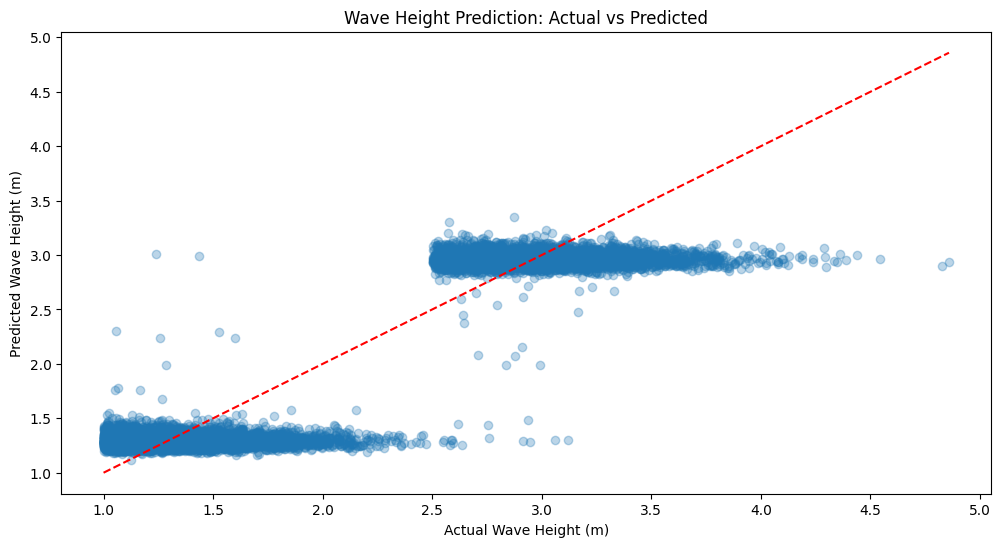

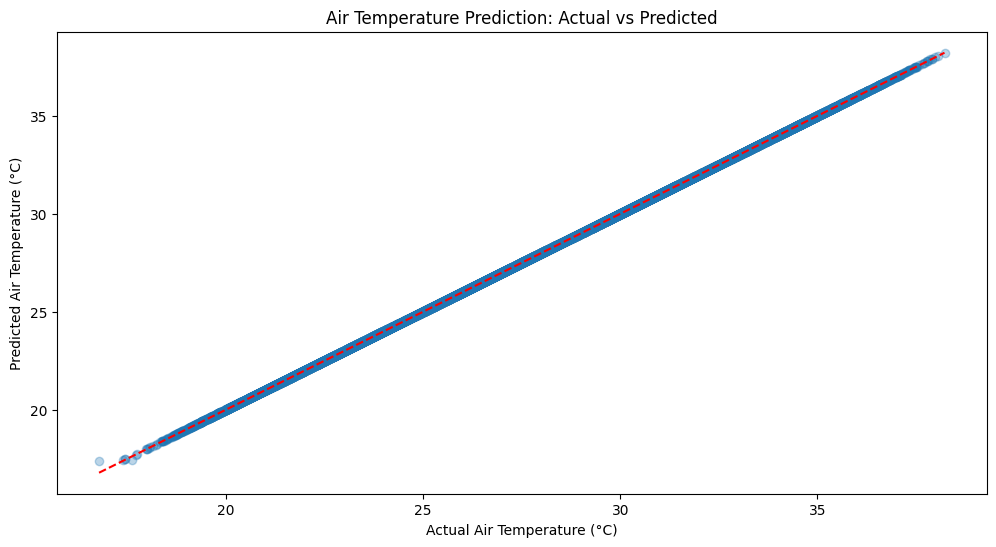

In [8]:
# %%
# Plot Wave Height Predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_wave_test, y_wave_pred, alpha=0.3)
plt.plot([min(y_wave_test), max(y_wave_test)], [min(y_wave_test), max(y_wave_test)], color="red", linestyle="--")
plt.xlabel("Actual Wave Height (m)")
plt.ylabel("Predicted Wave Height (m)")
plt.title("Wave Height Prediction: Actual vs Predicted")
plt.show()

# %%
# Plot Air Temperature Predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_temp_test, y_temp_pred, alpha=0.3)
plt.plot([min(y_temp_test), max(y_temp_test)], [min(y_temp_test), max(y_temp_test)], color="red", linestyle="--")
plt.xlabel("Actual Air Temperature (°C)")
plt.ylabel("Predicted Air Temperature (°C)")
plt.title("Air Temperature Prediction: Actual vs Predicted")
plt.show()


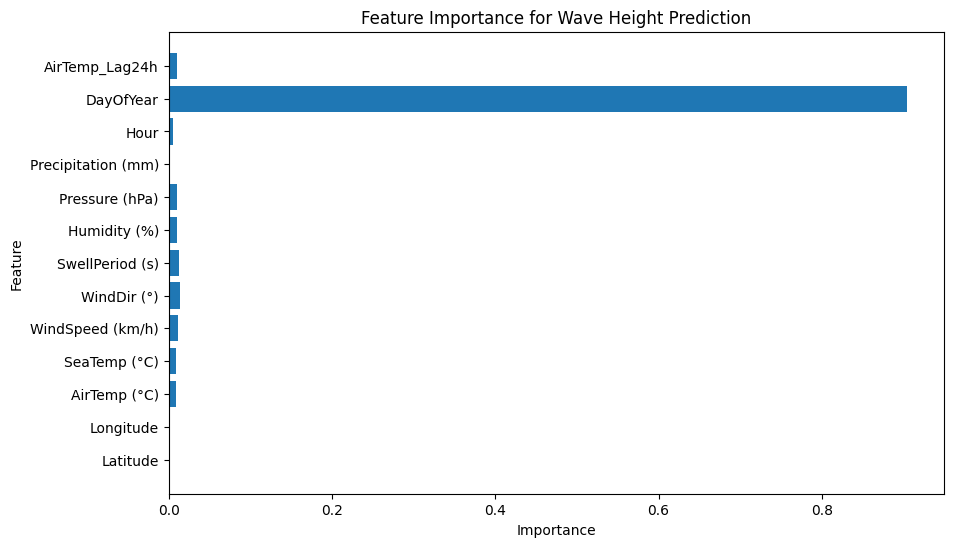

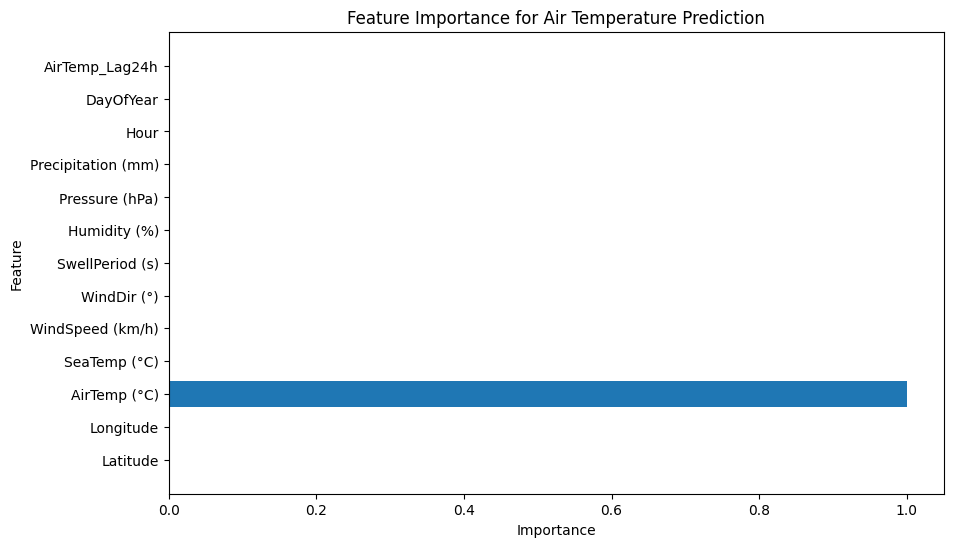

In [9]:
wave_importances = rf_wave.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, wave_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Wave Height Prediction")
plt.show()

# %%
# Get feature importances for Air Temperature Prediction
temp_importances = rf_temp.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, temp_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Air Temperature Prediction")
plt.show()


In [10]:
#

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def error_calculator(y_true, y_pred, target_name="Target"):
    """
    Calculate and print error metrics for model predictions.

    Parameters:
    - y_true: Ground truth target values.
    - y_pred: Predicted target values by the model.
    - target_name: Name of the target variable (default is "Target").
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Error Metrics for {target_name}:")
    print(f"  - MAE (Mean Absolute Error): {mae:.4f}")
    print(f"  - MSE (Mean Squared Error): {mse:.4f}")
    print(f"  - RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"  - R² (Coefficient of Determination): {r2:.4f}")
    print()

# Example usage:
error_calculator(y_wave_test, y_wave_pred, "Wave Height (m)")
error_calculator(y_temp_test, y_temp_pred, "Air Temperature (°C)")


Error Metrics for Wave Height (m):
  - MAE (Mean Absolute Error): 0.2090
  - MSE (Mean Squared Error): 0.0731
  - RMSE (Root Mean Squared Error): 0.2704
  - R² (Coefficient of Determination): 0.8940

Error Metrics for Air Temperature (°C):
  - MAE (Mean Absolute Error): 0.0003
  - MSE (Mean Squared Error): 0.0000
  - RMSE (Root Mean Squared Error): 0.0049
  - R² (Coefficient of Determination): 1.0000



In [ ]:
#for testing the model on new data this data set is generated by chatgpt reasoning and web search insted of the previously random search data 
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
csv_file = 'Ai2.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file)

# Preprocess Timestamp to extract Hour and DayOfYear if not already present
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Hour'] = df['Timestamp'].dt.hour
    df['DayOfYear'] = df['Timestamp'].dt.dayofyear
    df.drop('Timestamp', axis=1, inplace=True)

# Define features and targets
features = [
    "Latitude", "Longitude", "AirTemp (°C)", "SeaTemp (°C)", "WindSpeed (km/h)",
    "WindDir (°)", "SwellPeriod (s)", "Humidity (%)", "Pressure (hPa)",
    "Precipitation (mm)", "Hour", "DayOfYear", "AirTemp_Lag24h"
]

# Target variables
target_wave_height = "WaveHeight (m)"
target_air_temp = "AirTemp (°C)"

# Split into features and targets
X = df[features]
y_wave_height = df[target_wave_height]
y_air_temp = df[target_air_temp]

# Predict Wave Height
y_wave_pred = rf_wave.predict(X)
mse_wave = mean_squared_error(y_wave_height, y_wave_pred)
r2_wave = r2_score(y_wave_height, y_wave_pred)

# Predict Air Temperature
y_temp_pred = rf_temp.predict(X)
mse_temp = mean_squared_error(y_air_temp, y_temp_pred)
r2_temp = r2_score(y_air_temp, y_temp_pred)

# Display results
print(f"Wave Height Prediction - MSE: {mse_wave:.2f}, R²: {r2_wave:.2f}")
print(f"Air Temperature Prediction - MSE: {mse_temp:.2f}, R²: {r2_temp:.2f}")


Wave Height Prediction - MSE: 0.05, R²: -0.18
Air Temperature Prediction - MSE: 4.16, R²: -120.88


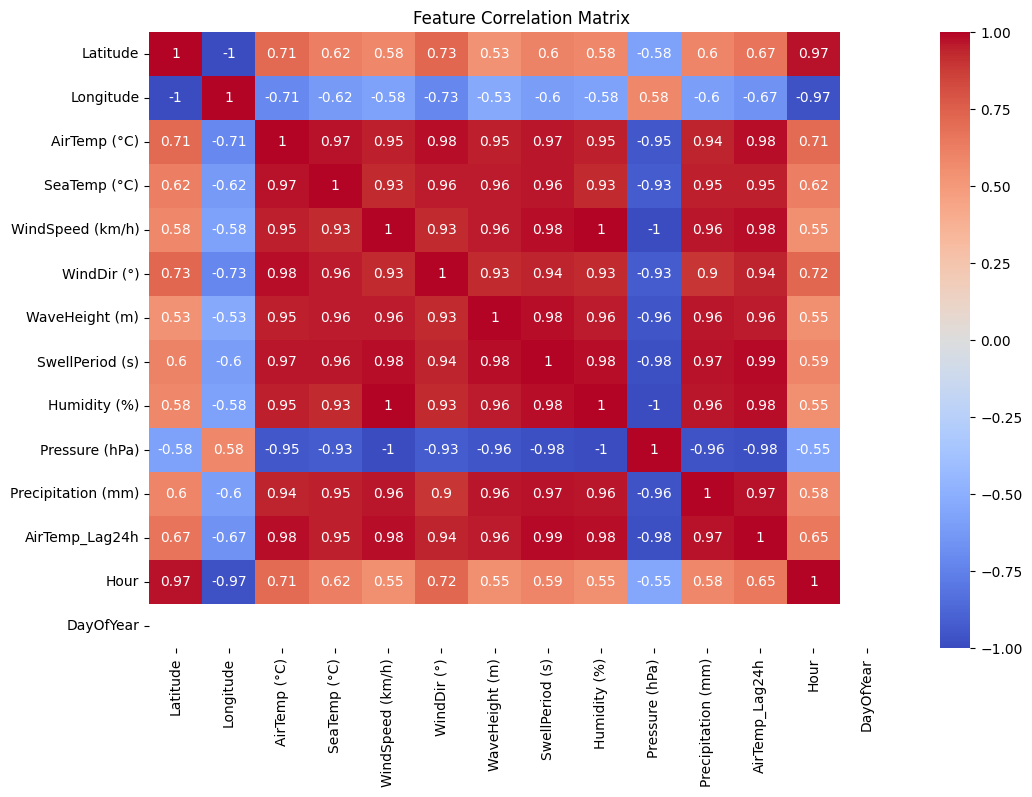

In [ ]:
#correction matrix

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()
